LOAD LIBRARIES


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

Visualize Dataset

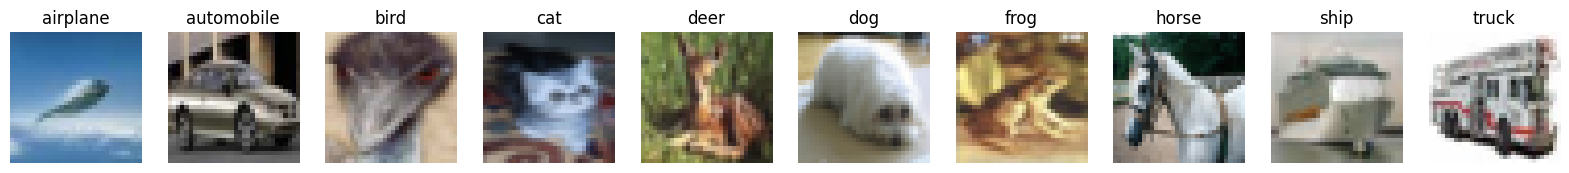

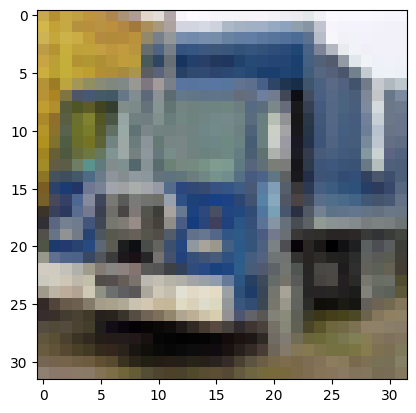

In [9]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
# Visualize a random image from each category
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1, len(class_names), figsize=(20, 20))
for i in range(len(class_names)):
    # Find indices of instances belonging to the current class
    class_indices = np.where(y_train == i)[0]

    # Select a random instance from the current class
    random_index = random.choice(class_indices)

    # Display the selected image
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

# Randomly checking a image
plt.imshow(x_test[14])

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


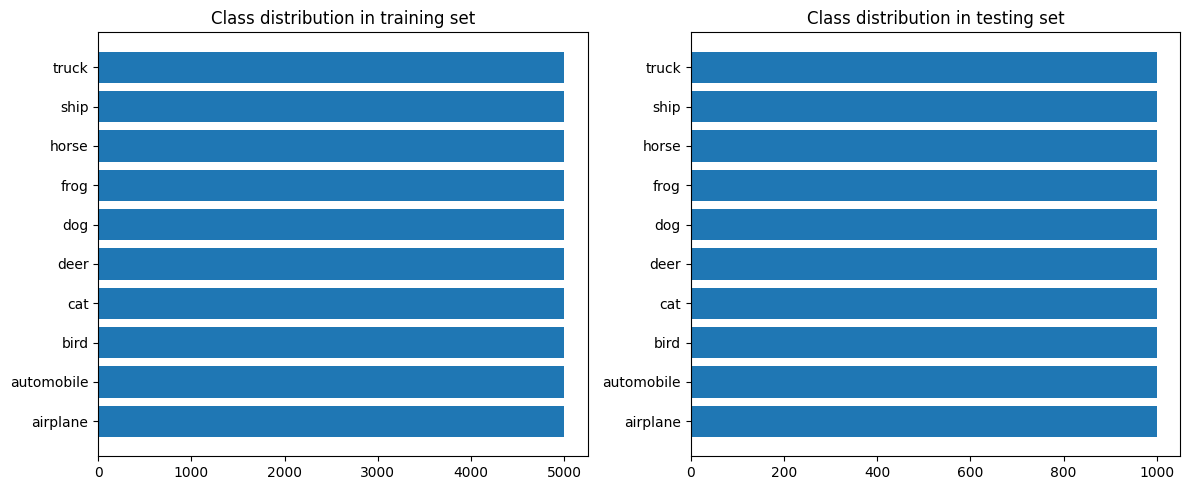

In [10]:
# the shape of the dataset
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

classes_train, counts_train = np.unique(y_train, return_counts=True)
classes_test, counts_test = np.unique(y_test, return_counts=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create a figure with two subplots
# Plot class distribution in the training set
axes[0].barh(class_names, counts_train)
axes[0].set_title('Class distribution in training set')
# Plot class distribution in the testing set
axes[1].barh(class_names, counts_test)
axes[1].set_title('Class distribution in testing set')
plt.tight_layout() # Adjust the layout to prevent overlap
plt.show()

MODEL 1

In [11]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Normalize the pixel values of the image data.
x_train=x_train/255
x_test=x_test/255

## MODEL 1

model_1=Sequential()

model_1.add(Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model_1.add(Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=2,strides=2,padding='valid')) # Max Pooling Layer

model_1.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_1.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=2,strides=2,padding='valid')) # Max Pooling Layer
model_1.add(Flatten()) # Flattening Layer
model_1.add(Dropout(0.5,noise_shape=None,seed=None)) # Droput Layer
model_1.add(Dense(units=128,activation='relu')) # Adding the first fully connected layer
model_1.add(Dense(units=10,activation='softmax')) # Output Layer

model_1.summary()

# compiling the sequential model
"If the class variable was one hot encoded, categorical cross entropy could be used. "
"But we use sparse categorical cross entropy because the y's, that is, the labels of the picture, consist of integer numbers."

model_1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 50 epochs
history_1 = model_1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

#Evaluate model
evaluation = model_1.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [12]:
evaluation = model_1.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.7913 - accuracy: 0.7917
Test Accuracy : 79.17%


313/313 [==============================] - 1s 2ms/step


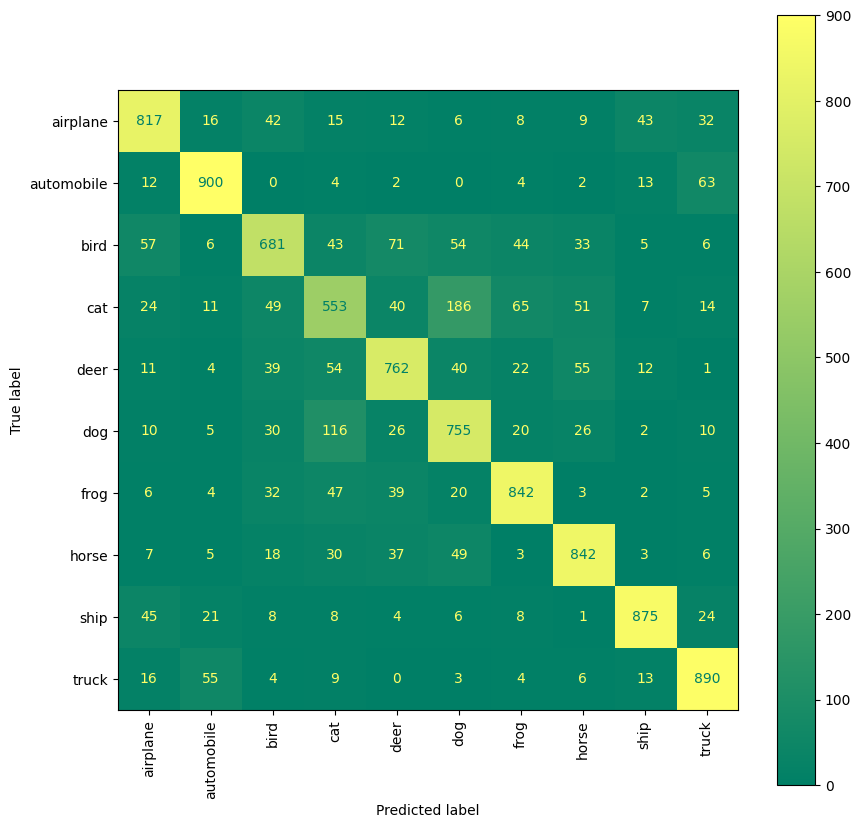

In [13]:
y_pred = model_1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.88      0.90      0.89      1000
           2       0.75      0.68      0.72      1000
           3       0.63      0.55      0.59      1000
           4       0.77      0.76      0.76      1000
           5       0.67      0.76      0.71      1000
           6       0.83      0.84      0.83      1000
           7       0.82      0.84      0.83      1000
           8       0.90      0.88      0.89      1000
           9       0.85      0.89      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



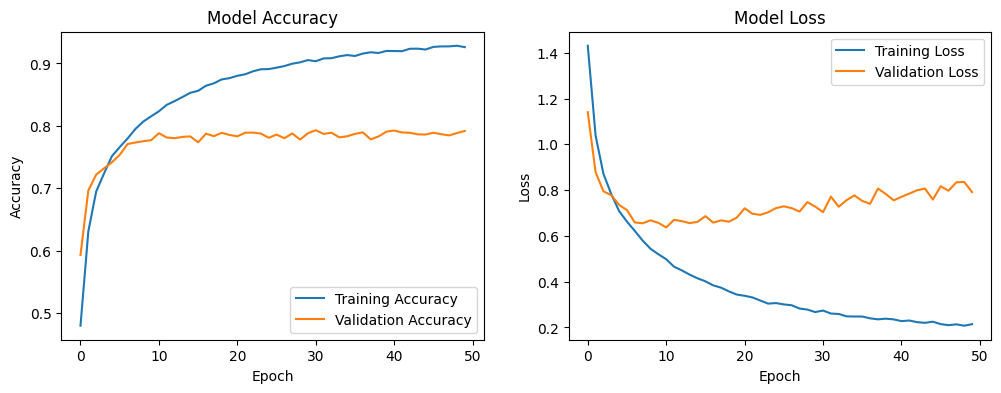

In [16]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history_1)

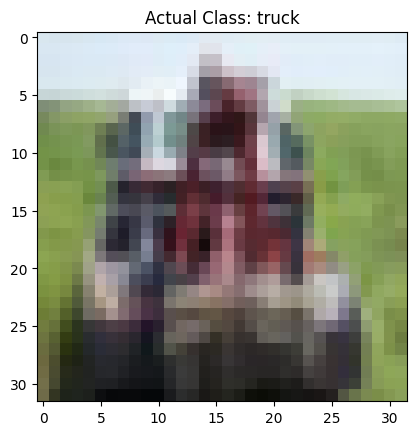

313/313 [==============================] - 1s 2ms/step
Predicted class for image at index 213: truck


In [17]:
# To plot the actual image at index
image_index = 213
# Get the actual class name using the index
actual_class = class_names[y_test[image_index][0]]
# Plot the actual image
plt.imshow(x_test[image_index])
plt.title(f"Actual Class: {actual_class}")
plt.show()
# To make a prediction on the image at index
predictions = model_1.predict(x_test)
predicted_class = class_names[tf.argmax(predictions[image_index]).numpy()]

print(f"Predicted class for image at index {image_index}: {predicted_class}")

MODEL 2

In [18]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Scale the data
x_train = x_train / 255
x_test = x_test / 255

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model_2 = Sequential()
input = (32, 32, 3)
kernel = (3, 3)
# Convolutional Layer
model_2.add(Conv2D(filters=32, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters=32, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
# Pooling layer
model_2.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters=64, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters=64, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters=128, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters=128, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(units=128,activation="relu"))
model_2.add(Dropout(0.25))
model_2.add(Dense(units=10,activation="softmax"))

model_2.summary()

# compiling the sequential model
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 30 epochs
history_2 = model_2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

#Evaluate model
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [19]:
evaluation_2 = model_2.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation_2[1] * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.5610 - accuracy: 0.8578
Test Accuracy : 85.78%


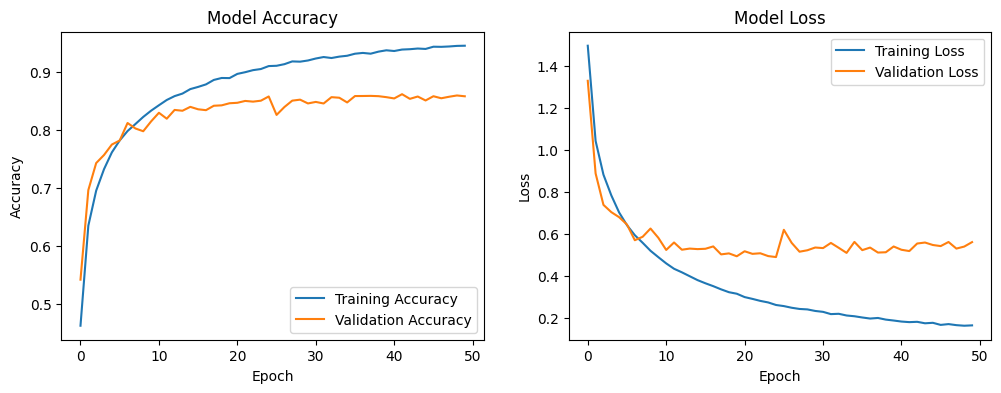

In [20]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history_2)

In [22]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Scale the data
x_train = x_train / 255
x_test = x_test / 255

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model_3 = Sequential()
input = (32, 32, 3)
kernel = (3, 3)
# Convolutional Layer
model_3.add(Conv2D(filters=32, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=32, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
# Pooling layer
model_3.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters=64, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=64, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters=128, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=128, kernel_size=kernel, padding="same", activation="relu", input_shape=input ))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())

model_3.add(Dense(units=128,activation="relu"))
model_3.add(Dropout(0.25))
model_3.add(Dense(units=10,activation="softmax"))

model_3.summary()

# compiling the sequential model
model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Data augmentation
batch_size =32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# training the model for 30 epochs
history_3 = model_3.fit(train_generator, epochs=50, steps_per_epoch=steps_per_epoch, validation_data=(x_test, y_test) )

#Evaluate model
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [23]:
evaluation_3 = model_3.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation_3[1] * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.3910 - accuracy: 0.8729
Test Accuracy : 87.29%


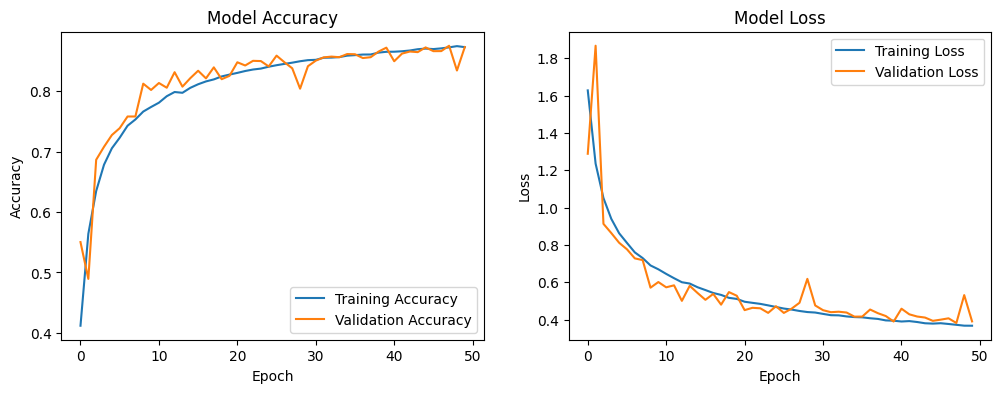

In [24]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history_3)